<table align="center" width=100%>
    <tr>
        <td width="20%">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=5px>
                    <b> Stock Market Portfolio Optimization <br>
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
        </td>
    </tr>
</table>

<a id="contents"> </a>
## Table of Contents:

1. **[Importing Required Libraries](#import)**
2. **[Putting together a 'Diverse' Portfolio](#portfolio)**
3. **[Exploratory Data Analysis](#eda)**
    - 3.1 - **[Overview of the Stock Prices over the 5-year period](#overview)**
    - 3.2 - **[Line Plots of the Price of the 3 chosen Stocks](#lineplot)**
    - 3.3 - **[Distribution Plots of the Price of the 3 chosen Stocks](#displot)**
    - 3.4 - **[Rolling Average of the Closing Stock Price to identify Trends](#rolling)**
    - 3.5 - **[Box Plots of the Price of the 3 chosen Stocks to identify Outliers](#boxplot)**
    - 3.6 - **[Trading Volume of the Chosen Stocks over the 5-Year Period](#volume)**
    - 3.7 - **[Market Cap of chosen Companies](#marketcap)**
    - 3.8 - **[Histograms of Daily Returns for chosen Stocks](#histreturn)**
    - 3.9 - **[Distribution Plots of Daily Returns for chosen Stocks](#distreturn)**
    - 3.10 - **[Box Plots of Daily Returns for chosen Stocks](#boxreturn)**
    - 3.11 - **[Pair Plots of Daily Returns for chosen Stocks](#pairreturn)**
    - 3.12 - **[Cumulative Returns of the chosen Stocks over the 5-year period](#cumreturn)**
4. **[Modern Portfolio Theory](#mpt)**
    - 4.1 - **[Plotting the Markowitz Curve](#markowitz)**

This project has an accompanying [Canva Presentation](https://www.canva.com/design/DAFxsZ8-4sI/fPhuHQPefUDUDcopfJGcIg/edit) explaining the findings in a manner more befitting a corporate setting.

<a id="import"> </a>
## 1. Importing Required Libraries:

[Back to Contents](#contents)

In [1]:
# importing numpy for arithmetic functions:
import numpy as np
# importing pandas to allow us to work with dataframes:
import pandas as pd

# importing matplotlib to plot graphs:
import matplotlib.pyplot as plt
# importing seaborn to plot better graphs:
import seaborn as sns

# importing yfinance to obtain stock data:
# !pip install yfinance
import yfinance as yf

# suppressing warning messages:
import warnings
warnings.filterwarnings('ignore')

<a id="portfolio"> </a>
## 2. Putting together a 'Diverse' Portfolio

[Back to Contents](#contents)

Selecting the stocks to add to our Portfolio is an involved process, but the basic idea is to diversify our portfolio to lower our risk. We want a stable portfolio that exhibits stable growth over time. It's okay for factors out of our control to affect some of the stocks, but not ALL of them. So we try to choose stocks that wouldn't simultaeneously be at great risk. This usually means selecting well-performing stocks from unrelated industries.

**Travel, Automotive and Consumer Tech are three (mostly) independent  industry sectors.**

We've selected Tesla, Boeing and Apple; all titans of their own respective industries.

In [2]:
# Obtaining Stock data for the 'diverse' portfolio containing stocks from different sectors:
df = yf.download(["TSLA","BA","AAPL"],start="2018-03-31", end="2023-04-01")

[*********************100%%**********************]  3 of 3 completed


In [3]:
# Taking a look at the first five rows of our data:
df.head()

Adj Close                             Close              \
                 AAPL          BA       TSLA       AAPL          BA   
Date                                                                  
2018-04-02  39.564400  308.799866  16.832001  41.669998  322.440002   
2018-04-03  39.970287  316.825409  17.835333  42.097500  330.820007   
2018-04-04  40.734619  313.588348  19.129333  42.902500  327.440002   
2018-04-05  41.017090  322.169342  20.381332  43.200001  336.399994   
2018-04-06  39.967918  312.324127  19.953333  42.095001  326.119995   

                            High                               Low  \
                 TSLA       AAPL          BA       TSLA       AAPL   
Date                                                                 
2018-04-02  16.832001  42.235001  329.940002  17.355333  41.117500   
2018-04-03  17.835333  42.187500  331.100006  18.223333  41.220001   
2018-04-04  19.129333  43.002499  327.809998  19.224667  41.192501   
2018-04-05  20.381332  43.557499  338.959991  20.417334  43.020000   
2018-04-06  19.953333  43.119999  334.589996  20.618668  42.049999   

                                        Open                         \
                    BA       TSLA       AAPL          BA       TSLA   
Date                                                                  
2018-04-02  317.170013  16.306000  41.660000  325.200012  17.084000   
2018-04-03  323.089996  16.966000  41.910000  324.760010  17.988001   
2018-04-04  311.880005  16.799999  41.220001  312.299988  16.851999   
2018-04-05  330.260010  19.213333  43.145000  330.589996  19.289333   
2018-04-06  322.209991  19.700001  42.742500  330.609985  20.066668   

               Volume                      
                 AAPL       BA       TSLA  
Date                                       
2018-04-02  150347200  5024900  241710000  
2018-04-03  121112000  4783100  282666000  
2018-04-04  138422000  8235700  298450500  
2018-04-05  107732800  6220000  286816500  
2018-04-06  140021200  5713600  202804500

In [4]:
# Taking a look at the number of rows, columns, and the data types of our columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2018-04-02 to 2023-03-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1260 non-null   float64
 1   (Adj Close, BA)    1260 non-null   float64
 2   (Adj Close, TSLA)  1260 non-null   float64
 3   (Close, AAPL)      1260 non-null   float64
 4   (Close, BA)        1260 non-null   float64
 5   (Close, TSLA)      1260 non-null   float64
 6   (High, AAPL)       1260 non-null   float64
 7   (High, BA)         1260 non-null   float64
 8   (High, TSLA)       1260 non-null   float64
 9   (Low, AAPL)        1260 non-null   float64
 10  (Low, BA)          1260 non-null   float64
 11  (Low, TSLA)        1260 non-null   float64
 12  (Open, AAPL)       1260 non-null   float64
 13  (Open, BA)         1260 non-null   float64
 14  (Open, TSLA)       1260 non-null   float64
 15  (Volume, AAPL)     1260 non-null   int64  
 16  (Volum

<a id="eda"> </a>
## 3. Exploratory Data Analysis:

[Back to Contents](#contents)

<a id="overview"> </a>
### 3.1. Overview of the Stock Prices over the 5-year period:

[Back to Contents](#contents)

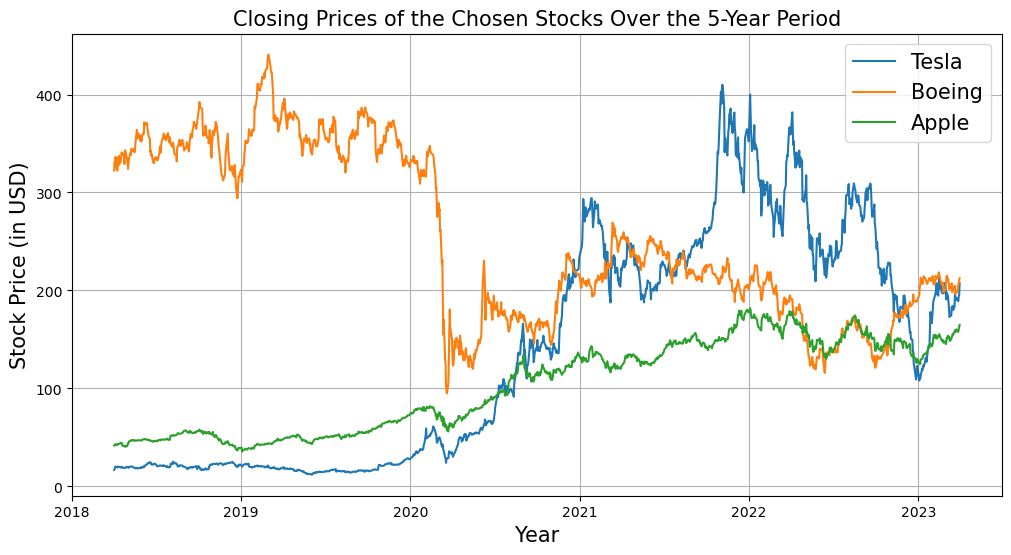

In [5]:
# Line Plot of the Closing Prices of the Chosen Stocks over the 5-year period:
# This gives us an overview of what has happened in this time period. World Events tend to leave their mark on the stock
# price of companies at the very top.

plt.figure(figsize=(12, 6))
plt.title(label="Closing Prices of the Chosen Stocks Over the 5-Year Period",
          fontsize=15)
sns.lineplot(x=df.index, y=df['Close']['TSLA'], label='Tesla')
sns.lineplot(x=df.index, y=df['Close']['BA'], label='Boeing')
sns.lineplot(x=df.index, y=df['Close']['AAPL'], label='Apple')
plt.xlabel("Year",
           fontsize=15)
plt.ylabel("Stock Price (in USD)",
           fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.show()

We can see a sharp decline in the price of Boeing stock roughly around the time the world went into lockdown in response to the COVID-19 Pandemic.

In [6]:
# Coefficient of variation 
df_closing=pd.concat([df['Close']['TSLA'],df['Close']['BA'],df['Close']['AAPL']],axis=1)
df_closing

,TSLA,BA,AAPL
Date,,,
2018-04-02,16.832001,322.440002,41.669998
2018-04-03,17.835333,330.820007,42.097500
2018-04-04,19.129333,327.440002,42.902500
2018-04-05,20.381332,336.399994,43.200001
2018-04-06,19.953333,326.119995,42.095001
...,...,...,...
2023-03-27,191.809998,200.570007,158.279999
2023-03-28,189.190002,204.960007,157.649994
2023-03-29,193.880005,207.970001,160.770004


<a id="lineplot"> </a>
### 3.2. Line Plots of the Price of the 3 chosen Stocks:

[Back to Contents](#contents)

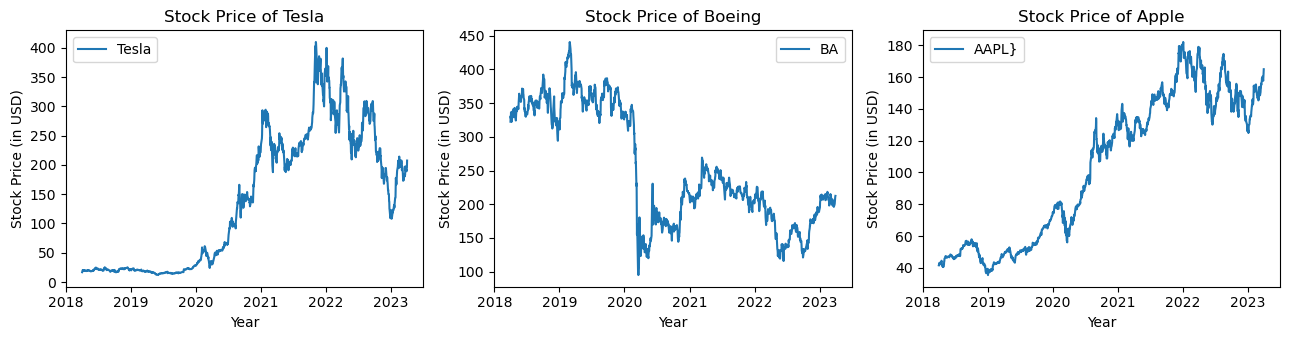

In [7]:
# Line Plot of the 3 chosen stocks for trend analysis
plt.figure(figsize=(13,3.5))
plt.subplot(1,3,1)
sns.lineplot(x=df.index, y=df['Close']['TSLA'], label='Tesla')
plt.title('Stock Price of Tesla')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.subplot(1,3,2)
sns.lineplot(x=df.index, y=df['Close']['BA'], label='BA')
plt.title('Stock Price of Boeing')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.subplot(1,3,3)
sns.lineplot(x=df.index, y=df['Close']['AAPL'], label='AAPL}')
plt.title('Stock Price of Apple')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.tight_layout()
plt.show()

1) The massive boost in the price of Tesla shares alligns with their phenomenal EV sales at the time:
They sold (936k EVs, of which) more than 900k model 3 sedans and model Y SUVs in 2021, which is almost double the total EVs they sold in 2020, ~ 500k, itself a significant increase from their sales in 2019, ~360k.
Source: https://www.statista.com/statistics/502208/tesla-quarterly-vehicle-deliveries/

2) We can see that Boeing shares experience a massive drop in price in early 2020 when lockdown was
put into effect, and restrictions were placed on travel

3) Apple stock price has also grown rapidly in this timeframe, it's one of the biggest tech companies in the world.

<a id="displot"> </a>
### 3.3. Distribution Plots of the Price of the 3 chosen Stocks:

[Back to Contents](#contents)

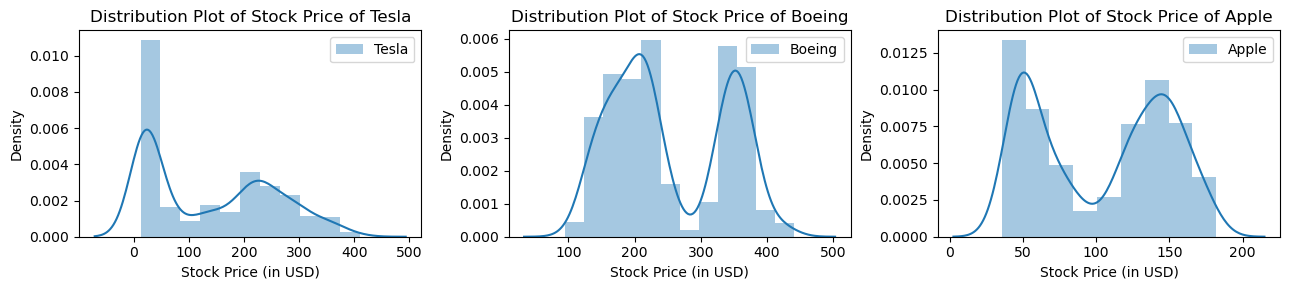

In [8]:
# Distribution plot for the 3 chosen stocks
plt.figure(figsize=(13,3))
plt.subplot(1,3,1)
sns.distplot(df['Close']['TSLA'],label='Tesla')
plt.title('Distribution Plot of Stock Price of Tesla')
plt.xlabel('Stock Price (in USD)')
plt.legend()
plt.subplot(1,3,2)
sns.distplot(df['Close']['BA'],label='Boeing')
plt.title('Distribution Plot of Stock Price of Boeing')
plt.xlabel('Stock Price (in USD)')
plt.legend()
plt.subplot(1,3,3)
sns.distplot(df['Close']['AAPL'],label='Apple')
plt.title('Distribution Plot of Stock Price of Apple')
plt.xlabel('Stock Price (in USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# Calculating the 75-Day Rolling Average of the Closing Stock Price to better identify trends:

df_mov_Tesla=pd.DataFrame(df['Close']['TSLA'].rolling(75).mean())
df_mov_Boeing=pd.DataFrame(df['Close']['BA'].rolling(75).mean())
df_mov_Apple=pd.DataFrame(df['Close']['AAPL'].rolling(75).mean())

<a id="rolling"> </a>
### 3.4. Rolling Average of the Closing Stock Price to identify Trends:

[Back to Contents](#contents)

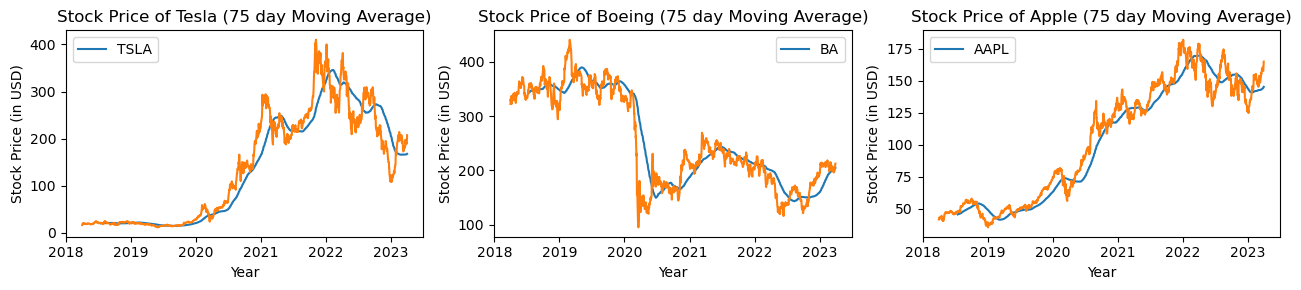

In [10]:
# 75-Day Rolling Average of the Closing Stock Price in an attempt to better identify trends:
plt.figure(figsize=(13,3))
plt.subplot(1,3,1)
sns.lineplot(df_mov_Tesla)
sns.lineplot(df['Close']['TSLA'])
plt.title('Stock Price of Tesla (75 day Moving Average)')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.subplot(1,3,2)
sns.lineplot(df_mov_Boeing)
sns.lineplot(df['Close']['BA'])
plt.title('Stock Price of Boeing (75 day Moving Average)')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.subplot(1,3,3)
sns.lineplot(df_mov_Apple)
sns.lineplot(df['Close']['AAPL'])
plt.title('Stock Price of Apple (75 day Moving Average)')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.tight_layout()
plt.show()

<a id="boxplot"> </a>
### 3.5. Box Plots of the Price of the 3 chosen Stocks to identify Outliers:

[Back to Contents](#contents)

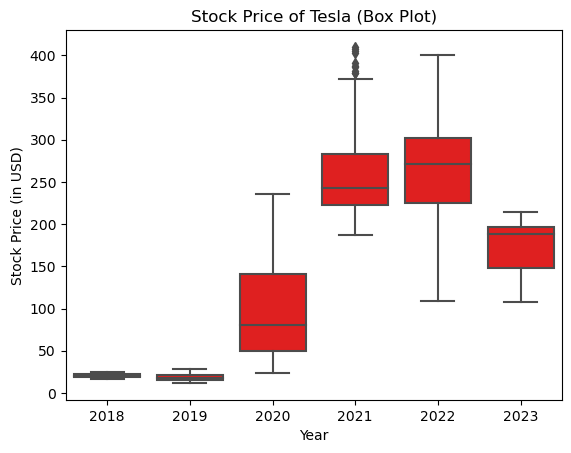

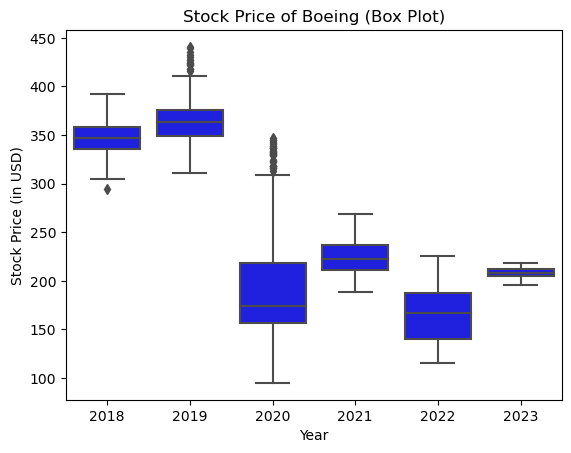

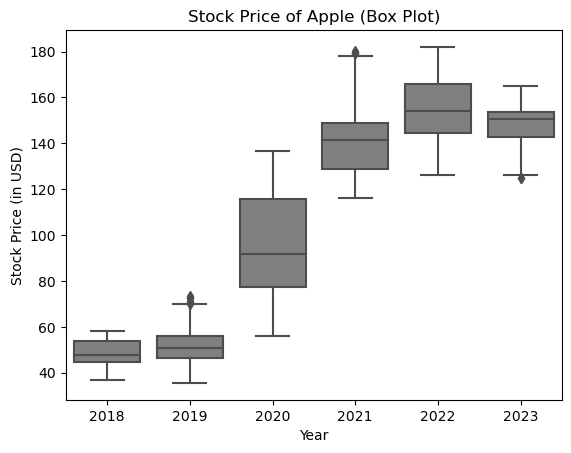

In [11]:
# Looking for Outliers in the Closing Price of the Chosen Stocks:
# Outliers in Stock Price are where the risk is the highest, but also where opportunities for gains lie.

# Resetting the Index of df_closing:
df_closing.reset_index(inplace=True)

# Box Plot for the Stock Price of Tesla:
import datetime as dt
df_closing['Year']=df_closing['Date'].dt.year
sns.boxplot(x=df_closing['Year'].astype(str),y=df_closing['TSLA'],color='Red')
plt.title('Stock Price of Tesla (Box Plot)')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.show()

# Box Plot for the Stock Price of Boeing:
sns.boxplot(x=df_closing['Year'].astype(str),y=df_closing['BA'],color='blue')
plt.title('Stock Price of Boeing (Box Plot)')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.show()

# Box Plot for the Stock Price of Apple[Back to Contents](#contents):
sns.boxplot(x=df_closing['Year'].astype(str),y=df_closing['AAPL'],color='grey')
plt.title('Stock Price of Apple (Box Plot)')
plt.xlabel('Year')
plt.ylabel('Stock Price (in USD)')
plt.show()

<a id="volume"> </a>
### 3.6. Trading Volume of the Chosen Stocks over the 5-Year Period:

[Back to Contents](#contents)

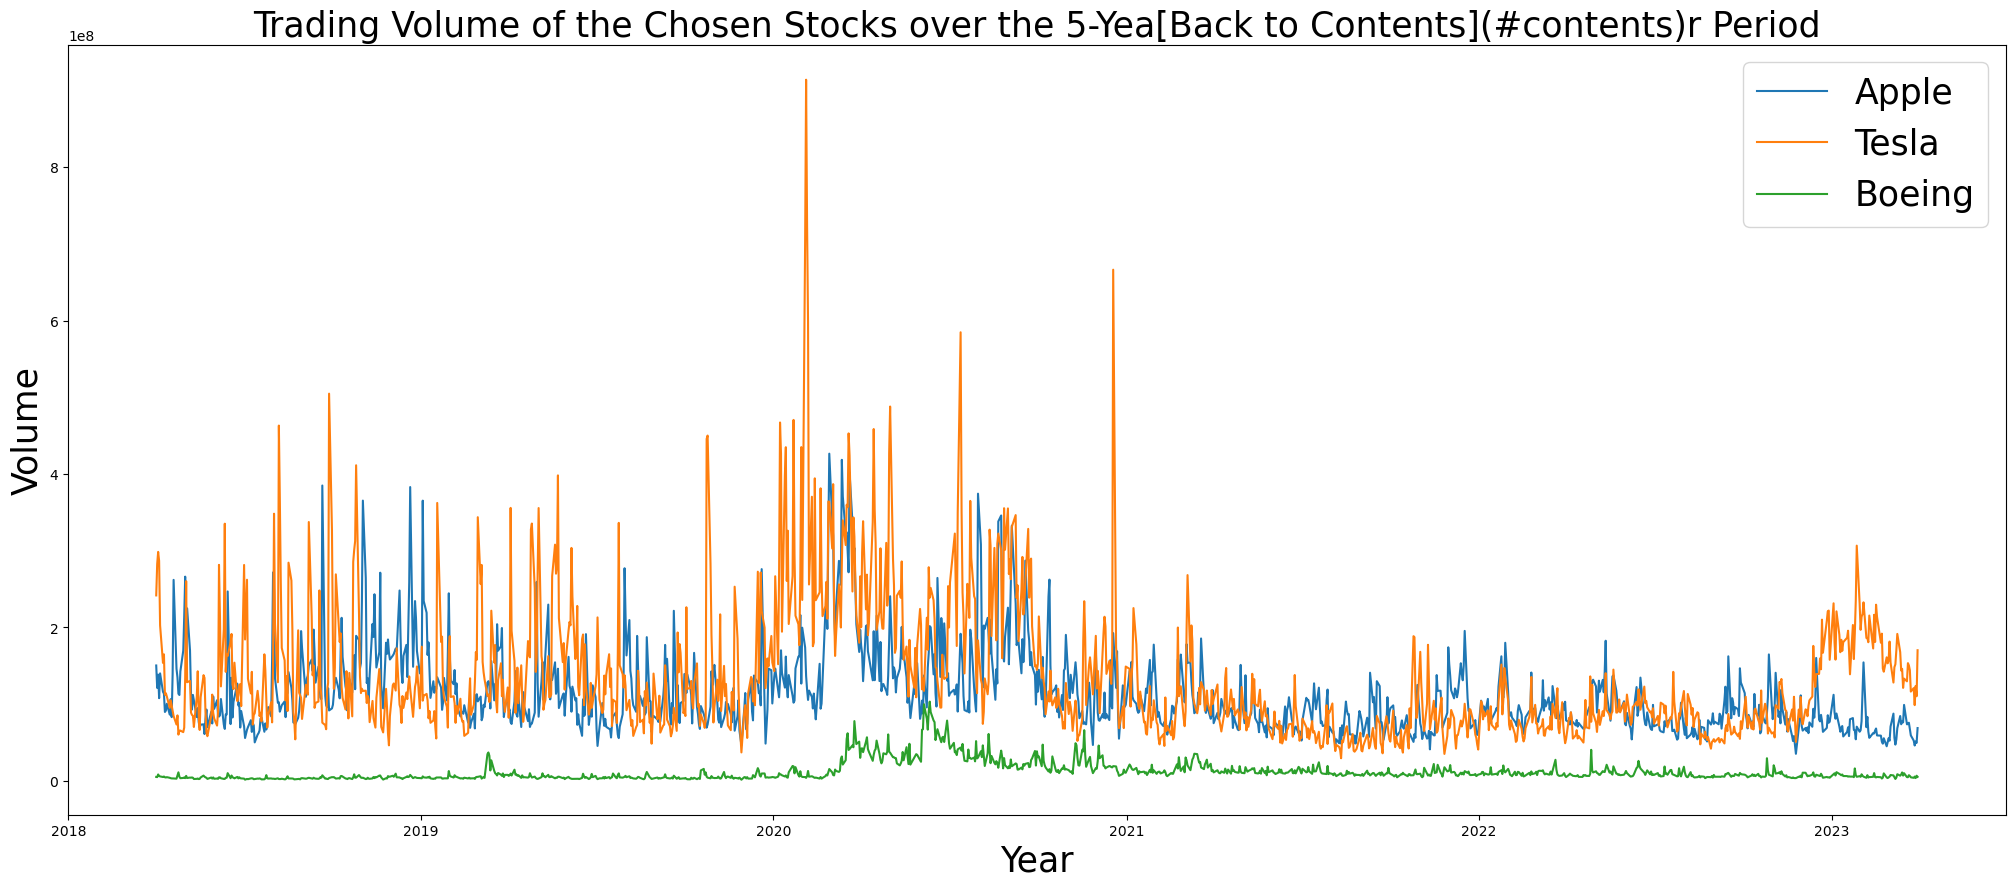

In [12]:
# What happens to Open Price when Volume spikes?
plt.figure(figsize=(25,10))
sns.lineplot(x=df.index,y=df['Volume']['AAPL'],label='Apple')
sns.lineplot(x=df.index,y=df['Volume']['TSLA'],label='Tesla')
sns.lineplot(x=df.index,y=df['Volume']['BA'],label='Boeing')
plt.xlabel(xlabel='Year',
           fontsize=25)
plt.ylabel(ylabel='Volume',
           fontsize=25)
plt.title(label='Trading Volume of the Chosen Stocks over the 5-Yea[Back to Contents](#contents)r Period',
          fontsize=25)
plt.legend(fontsize=25)
plt.show()

In [13]:
df[df['Volume']['TSLA'] == df['Volume']['TSLA'].max()]

Adj Close                            Close                         \
                AAPL         BA       TSLA       AAPL          BA       TSLA   
Date                                                                           
2020-02-04  77.65847  316.05954  59.137333  79.712502  317.940002  59.137333   

                 High                               Low              \
                 AAPL          BA       TSLA       AAPL          BA   
Date                                                                  
2020-02-04  79.910004  319.480011  64.599335  78.407501  315.029999   

                            Open                            Volume           \
                 TSLA       AAPL          BA       TSLA       AAPL       BA   
Date                                                                          
2020-02-04  55.591999  78.827499  318.279999  58.863998  136616400  3779800   

                       
                 TSLA  
Date                   
2020-02-04  914082000

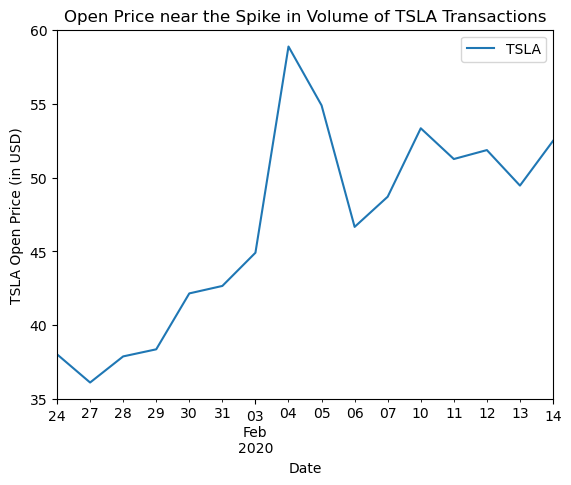

In [14]:
# Let's see what happened to the price of TSLA 10 days pre and post the day of this maximum volume
df['Open']['TSLA'].loc['2020-01-24':'2020-02-14'].plot(kind='line')
plt.title('Open Price near the Spike in Volume of TSLA Transactions')
plt.legend()
plt.ylabel('TSLA Open Price (in USD)')
plt.show()

The Volume went up, price ALSO went up

In [15]:
# trying to get the last spike in 2021
df[df['Volume']['TSLA'] == df.loc['2021-09-30':'2022-01-01']['Volume']['TSLA'].max()]

Adj Close                               Close              \
                  AAPL          BA        TSLA        AAPL          BA   
Date                                                                     
2021-10-25  146.746689  212.869995  341.619995  148.639999  212.869995   

                              High                                 Low  \
                  TSLA        AAPL          BA        TSLA        AAPL   
Date                                                                     
2021-10-25  341.619995  149.369995  213.979996  348.339996  147.619995   

                                          Open                        Volume  \
                    BA        TSLA        AAPL      BA        TSLA      AAPL   
Date                                                                           
2021-10-25  211.699997  314.733337  148.679993  213.25  316.843323  50720600   

                                
                 BA       TSLA  
Date                            
2021-10-25  7239100  188556300

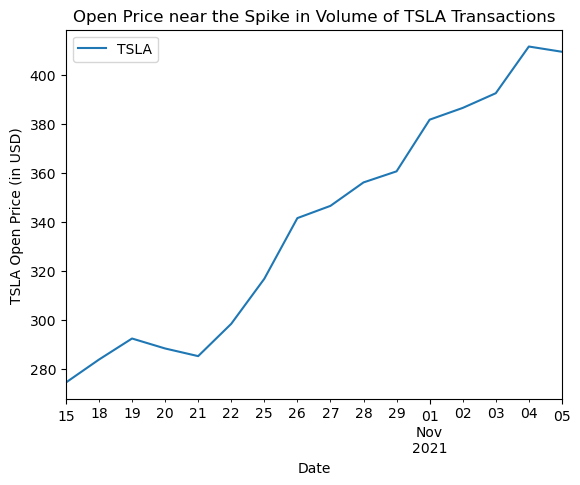

In [16]:
# Let's see what happened to the price of TSLA 10 days pre and post the day of this maximum volume
df['Open']['TSLA'].loc['2021-10-15':'2021-11-05'].plot(kind='line')
plt.title('Open Price near the Spike in Volume of TSLA Transactions')
plt.legend()
plt.ylabel('TSLA Open Price (in USD)')
plt.show()

The Volume went up, price ALSO went up

In [17]:
# Calculating the Market Cap of chosen 3 stocks
df['Total Traded TSLA'] = df['Open']['TSLA']*df['Volume']['TSLA']
df['Total Traded AAPL'] = df['Open']['AAPL']*df['Volume']['AAPL']
df['Total Traded BA'] = df['Open']['BA']*df['Volume']['BA']
df[df['Total Traded TSLA'] == df['Total Traded TSLA'].max()]

Adj Close                           Close                      \
                  AAPL      BA        TSLA        AAPL      BA        TSLA   
Date                                                                         
2020-12-18  124.461899  219.75  231.666672  126.660004  219.75  231.666672   

                  High                                 Low  ...              \
                  AAPL          BA        TSLA        AAPL  ...        TSLA   
Date                                                        ...               
2020-12-18  129.100006  223.460007  231.666672  126.120003  ...  209.513336   

                  Open                            Volume                       \
                  AAPL          BA       TSLA       AAPL        BA       TSLA   
Date                                                                            
2020-12-18  128.960007  222.050003  222.96666  192541500  19092800  666378600   

           Total Traded TSLA Total Traded AAPL Total Traded BA  
                                                                
Date                                                            
2020-12-18      1.485802e+11      2.483015e+10    4.239556e+09  

[1 rows x 21 columns]

<a id="marketcap"> </a>
### 3.7. Market Cap of chosen Companies:

[Back to Contents](#contents)

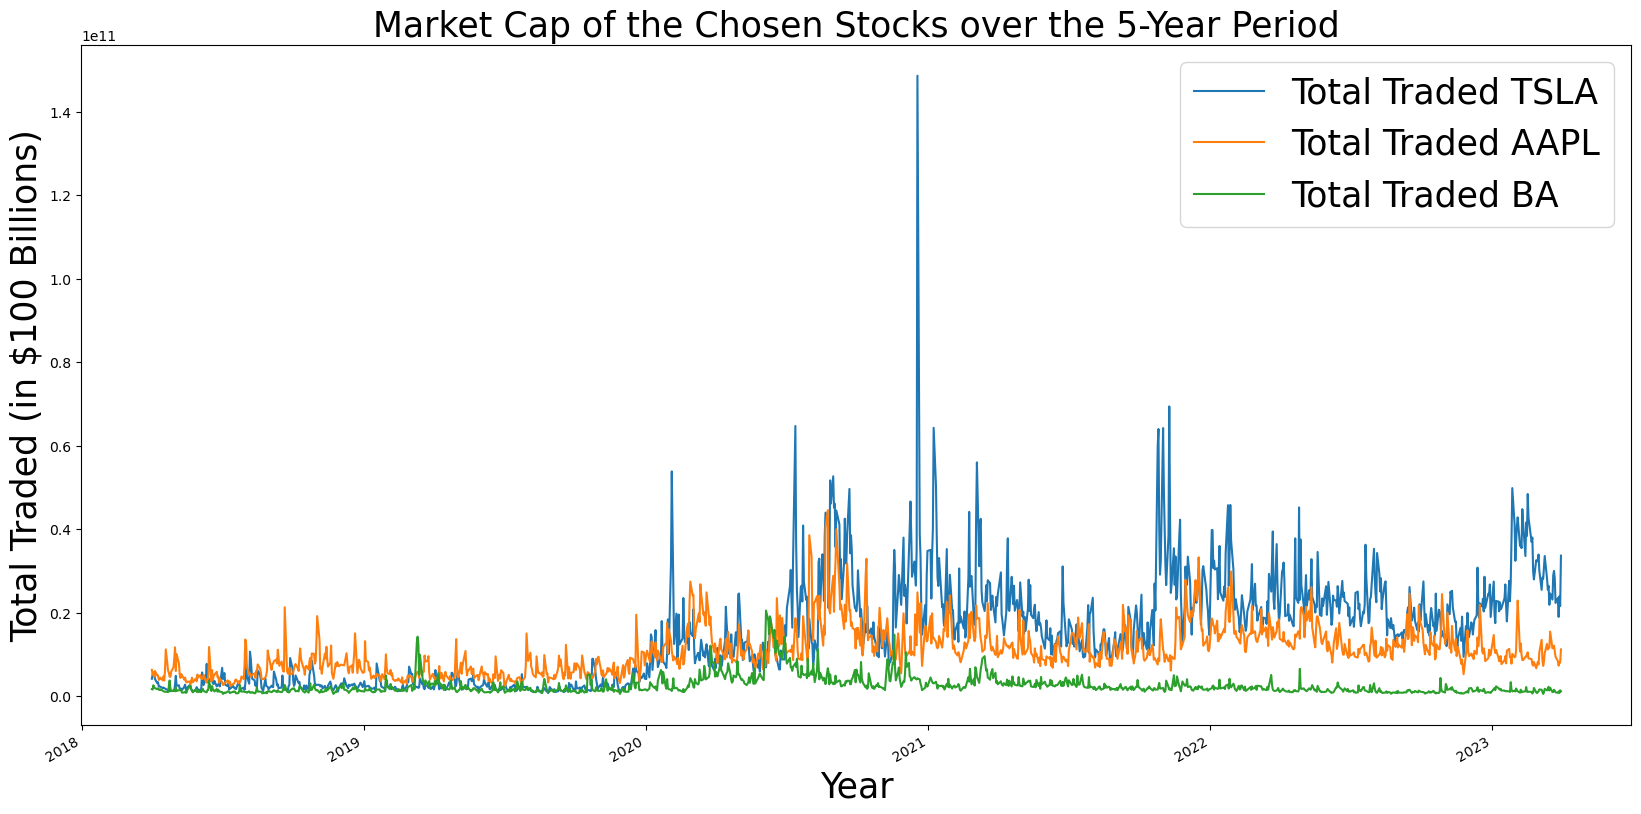

In [18]:
# Calculating the Market Cap of the chosen companies:
plt.figure(figsize=(20,10))
df['Total Traded TSLA'].plot(kind='line')
df['Total Traded AAPL'].plot(kind='line')
df['Total Traded BA'].plot(kind='line')
plt.title(label='Market Cap of the Chosen Stocks over the 5-Year Period',
          fontsize=25)
plt.ylabel(ylabel='Total Traded (in $100 Billions)',
           fontsize=25)
plt.xlabel(xlabel='Year',
           fontsize=25)
plt.legend(fontsize=25)
plt.show()

In [19]:
df_closing2=pd.concat([df['Close']['TSLA'],df['Close']['BA'],df['Close']['AAPL']],axis=1)

In [20]:
# Daily Returns of the chosen 3 stocks
df_closing2['daily_returns_TSLA'] = df_closing2['TSLA'].diff()/df_closing2['TSLA'].shift(periods=1)
df_closing2['daily_returns_BA'] = df_closing2['TSLA'].diff()/df_closing2['BA'].shift(periods=1)
df_closing2['daily_returns_AAPL'] = df_closing2['TSLA'].diff()/df_closing2['AAPL'].shift(periods=1)
df_closing2

,TSLA,BA,AAPL,daily_returns_TSLA,daily_returns_BA,daily_returns_AAPL
Date,,,,,,
2018-04-02,16.832001,322.440002,41.669998,NaN,NaN,NaN
2018-04-03,17.835333,330.820007,42.097500,0.059609,0.003112,0.024078
2018-04-04,19.129333,327.440002,42.902500,0.072553,0.003911,0.030738
2018-04-05,20.381332,336.399994,43.200001,0.065449,0.003824,0.029182
2018-04-06,19.953333,326.119995,42.095001,-0.021000,-0.001272,-0.009907
...,...,...,...,...,...,...
2023-03-27,191.809998,200.570007,158.279999,0.007353,0.007088,0.008736
2023-03-28,189.190002,204.960007,157.649994,-0.013659,-0.013063,-0.016553
2023-03-29,193.880005,207.970001,160.770004,0.024790,0.022883,0.029749


<a id="histreturn"> </a>
### 3.8. Histograms of Daily Returns for chosen Stocks:

[Back to Contents](#contents)

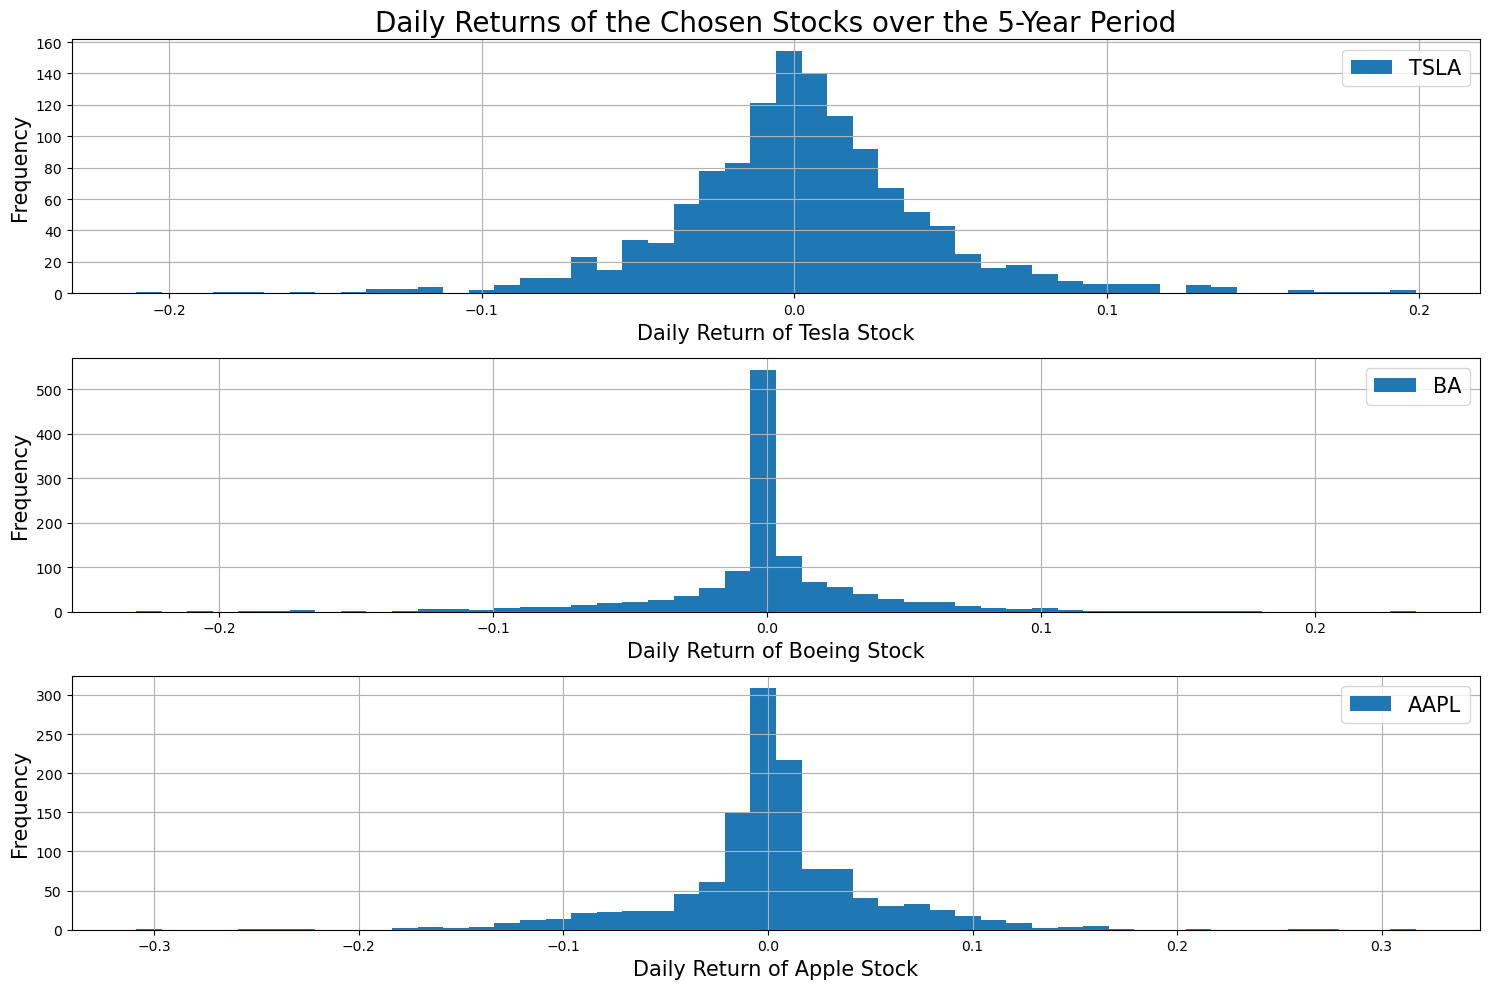

In [21]:
# plotting histograms of daily returns, greater width means greater volatility
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
df_closing2['daily_returns_TSLA'].hist(bins=50,label='TSLA')
plt.title(label='Daily Returns of the Chosen Stocks over the 5-Year Period',
          fontsize=20)
plt.xlabel(xlabel='Daily Return of Tesla Stock',
           fontsize=15)
plt.ylabel(ylabel='Frequency',
           fontsize=15)
plt.legend(fontsize=15)
plt.subplot(3,1,2)
df_closing2['daily_returns_BA'].hist(bins=50,label='BA')
plt.xlabel(xlabel='Daily Return of Boeing Stock',
           fontsize=15)
plt.ylabel(ylabel='Frequency',
           fontsize=15)
plt.legend(fontsize=15)
plt.subplot(3,1,3)
df_closing2['daily_returns_AAPL'].hist(bins=50,label='AAPL',)
plt.xlabel(xlabel='Daily Return of Apple Stock',
           fontsize=15)
plt.ylabel(ylabel='Frequency',
           fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

<a id="distreturn"> </a>
### 3.9. Distribution Plots of Daily Returns for chosen Stocks:

[Back to Contents](#contents)

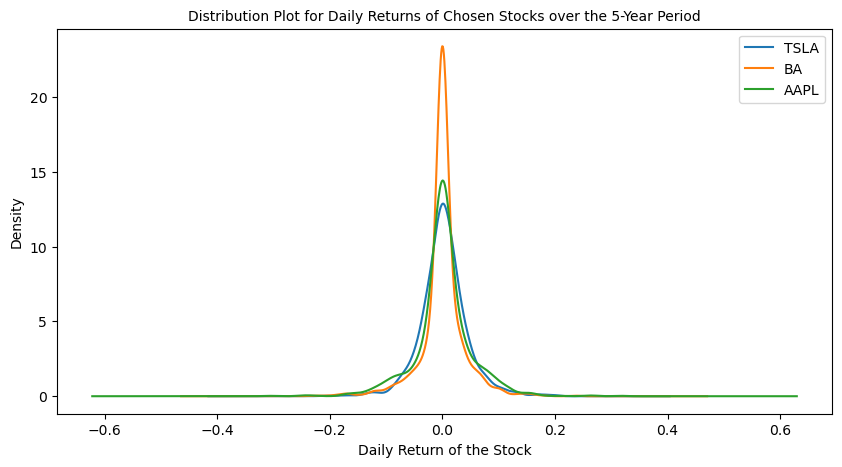

In [22]:
# Plotting distribution curves for more clarity:
# The Histograms in the previous cell were not to scale and can't be directly compared.
plt.figure(figsize=(10,5))
df_closing2['daily_returns_TSLA'].plot(kind='kde',label='TSLA')
df_closing2['daily_returns_BA'].plot(kind='kde',label='BA')
df_closing2['daily_returns_AAPL'].plot(kind='kde',label='AAPL')
plt.title(label='Distribution Plot for Daily Returns of Chosen Stocks over the 5-Year Period',
          fontsize=10)
plt.xlabel(xlabel='Daily Return of the Stock')
plt.legend()
plt.show()

In [23]:
df_closing2[['daily_returns_TSLA','daily_returns_BA','daily_returns_AAPL']]

,daily_returns_TSLA,daily_returns_BA,daily_returns_AAPL
Date,,,
2018-04-02,NaN,NaN,NaN
2018-04-03,0.059609,0.003112,0.024078
2018-04-04,0.072553,0.003911,0.030738
2018-04-05,0.065449,0.003824,0.029182
2018-04-06,-0.021000,-0.001272,-0.009907
...,...,...,...
2023-03-27,0.007353,0.007088,0.008736
2023-03-28,-0.013659,-0.013063,-0.016553
2023-03-29,0.024790,0.022883,0.029749


<a id="boxreturn"> </a>
### 3.10. Box Plots of Daily Returns for chosen Stocks:

[Back to Contents](#contents)

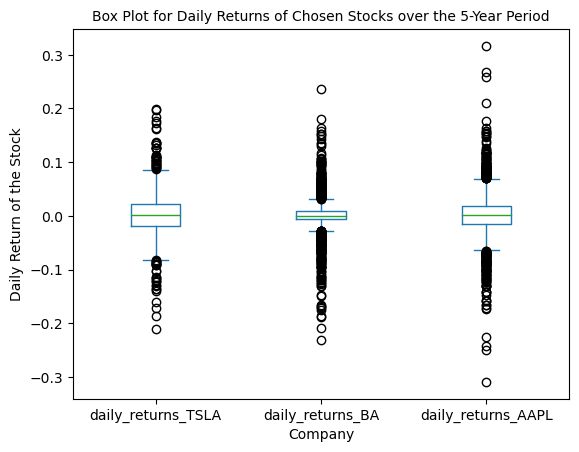

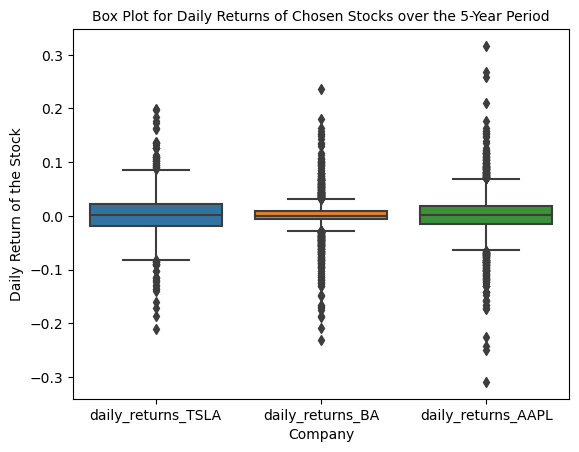

In [24]:
# Plotting boxplots for the daily returns in the overall time period using Matplotlib:
df_returns = df_closing2[['daily_returns_TSLA','daily_returns_BA','daily_returns_AAPL']]
df_returns.plot(kind='box')
plt.title(label='Box Plot for Daily Returns of Chosen Stocks over the 5-Year Period',
          fontsize=10)
plt.xlabel(xlabel='Company',
           fontsize=10)
plt.ylabel(ylabel='Daily Return of the Stock',
           fontsize=10)
plt.show()

# Plotting boxplots for the daily returns[Back to Contents](#contents) in the overall time period using Seaborn:
# df_returns = df_closing2[['daily_returns_TSLA','daily_returns_BA','daily_returns_AAPL']]
# df_returns.plot(kind='box')
sns.boxplot(df_returns)
plt.title(label='Box Plot for Daily Returns of Chosen Stocks over the 5-Year Period',
          fontsize=10)
plt.xlabel(xlabel='Company',
           fontsize=10)
plt.ylabel(ylabel='Daily Return of the Stock',
           fontsize=10)
plt.show()

In [25]:
df_returns.describe()

,daily_returns_TSLA,daily_returns_BA,daily_returns_AAPL
count,1259.000000,1259.000000,1259.000000
mean,0.002872,0.000612,0.001760
std,0.041911,0.039262,0.050950
min,-0.210628,-0.230421,-0.308960
25%,-0.019304,-0.005485,-0.014488
50%,0.001939,0.000284,0.001499
75%,0.022809,0.009443,0.019203
max,0.198949,0.236771,0.316776


In [26]:
# AAPL has the highest volatility

<a id="pairreturn"> </a>
### 3.11. Pair Plots of Daily Returns for chosen Stocks:

[Back to Contents](#contents)

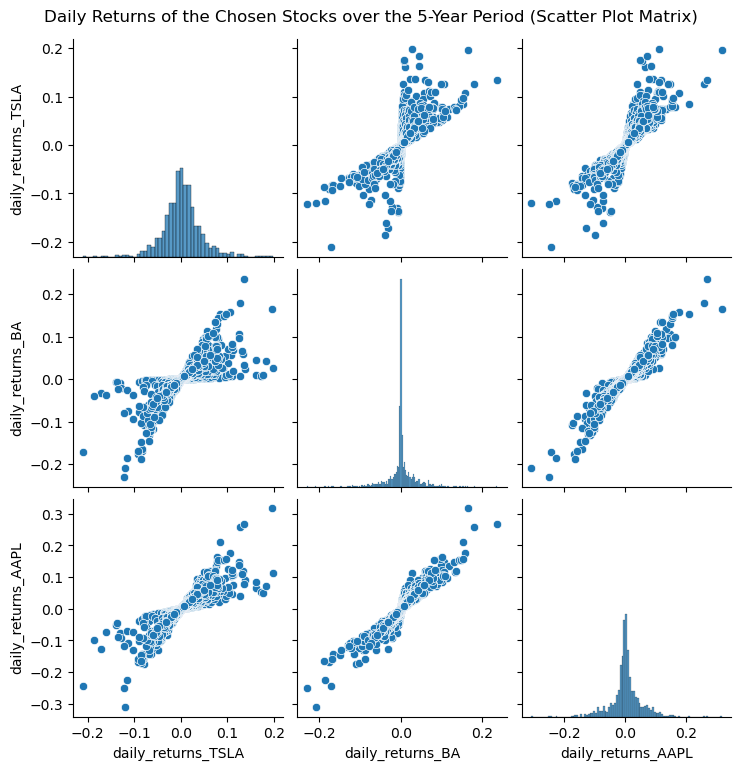

In [27]:
# Pair Plot of the chosen 3 stocks
sns.pairplot(df_returns)
plt.suptitle('Daily Returns of the Chosen Stocks over the 5-Year Period (Scatter Plot Matrix)',
             y=1.02)
plt.show()

We can see the highest coorelation between the returns given by Apple and Boeing Stocks.

In [28]:
# Obtaining the Correlation Matrix between the Daily Returns:
df_returns.corr()

,daily_returns_TSLA,daily_returns_BA,daily_returns_AAPL
daily_returns_TSLA,1.000000,0.743937,0.864394
daily_returns_BA,0.743937,1.000000,0.956220
daily_returns_AAPL,0.864394,0.956220,1.000000


<a id="cumreturn"> </a>
### 3.12. Cumulative Returns of the chosen Stocks over the 5-year period:

[Back to Contents](#contents)

In [29]:
# How much would you get in return if you'd invested $1 on 31-03-2018?
df_returns['CUM_returns_TSLA'] = 1*(1 + df_returns['daily_returns_TSLA']).cumprod()
df_returns['CUM_returns_BA'] = 1*(1 + df_returns['daily_returns_BA']).cumprod()
df_returns['CUM_returns_AAPL'] = 1*(1 + df_returns['daily_returns_AAPL']).cumprod()
# Using tail method to get the last value, i.e, return over a 5-year period
df_returns[['CUM_returns_TSLA','CUM_returns_BA','CUM_returns_AAPL']].tail(1)

,CUM_returns_TSLA,CUM_returns_BA,CUM_returns_AAPL
Date,,,
2023-03-31,12.325333,0.804858,1.757644


In [30]:
df_returns[['CUM_returns_TSLA','CUM_returns_BA','CUM_returns_AAPL']].max()

CUM_returns_TSLA    24.356582
CUM_returns_BA       5.646981
CUM_returns_AAPL    14.705332
dtype: float64

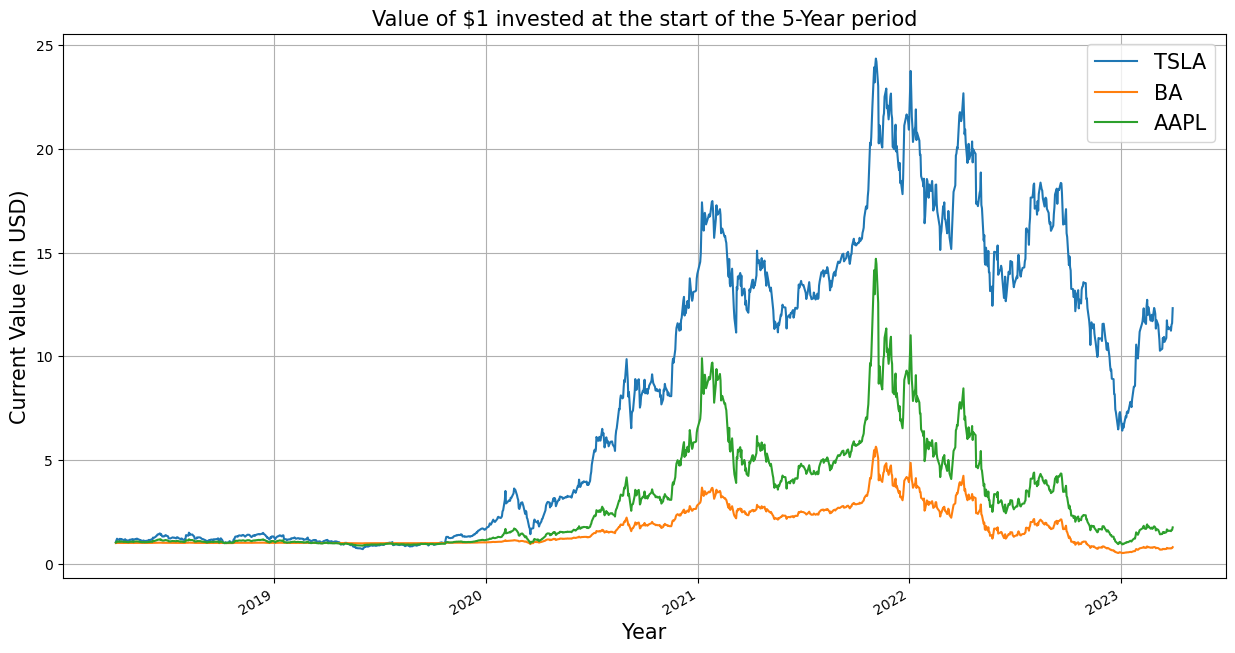

In [31]:
# Trend of the value of the $1 invested throughout the 5-year period
plt.figure(figsize=(15,8))
df_returns['CUM_returns_TSLA'].plot(label='TSLA')
df_returns['CUM_returns_BA'].plot(label='BA')
df_returns['CUM_returns_AAPL'].plot(label='AAPL')
plt.title(label='Value of $1 invested at the start of the 5-Year period',
          fontsize=15)
plt.ylabel(ylabel='Current Value (in USD)',
           fontsize=15)
plt.xlabel(xlabel='Year',
           fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

We can see that our returns would be the highest if we invested in Apple and Tesla.
We'll proceed with Apple and Tesla in our portfolio, then optimize the weights of these stocks in our portfolio.

<a id="mpt"> </a>
## 4. Modern Portfolio Theory:

[Back to Contents](#contents)

In [32]:
# getting the closing prices of the first days of each quarter for the chosen stocks
qtr_stocks = df.iloc[::63]['Close']
qtr_stocks.head()

,AAPL,BA,TSLA
Date,,,
2018-04-02,41.669998,322.440002,16.832001
2018-06-29,46.277500,335.510010,22.863333
2018-09-28,56.435001,371.899994,17.651333
2018-12-31,39.435001,322.500000,22.186666
2019-04-02,48.505001,390.750000,19.058666


In [33]:
price_diff_AAPL = qtr_stocks['AAPL'].diff()

# quarterly rate of return for AAPL
# using shift method to get previous quarter's price for the current row
qtr_ror_AAPL = qtr_stocks['AAPL'].diff()/qtr_stocks['AAPL'].shift(periods=1)
df_qtr_ror_AAPL = pd.DataFrame(qtr_ror_AAPL)

# expected quarterly rate of return for AAPL for a five-year period
qtr_exp_ror_AAPL = qtr_ror_AAPL.mean()

# quarterly volatility of AAPL for a five-year period
qtr_volatility_AAPL = qtr_ror_AAPL.std()

# quarterly rate of return for TSLA
# using shift method to get previous quarter's price for the current row
qtr_ror_TSLA = qtr_stocks['TSLA'].diff()/qtr_stocks['TSLA'].shift(periods=1)
df_qtr_ror_TSLA = pd.DataFrame(qtr_ror_TSLA)

# expected quarterly rate of return for TSLA for a five-year period
qtr_exp_ror_TSLA = qtr_ror_TSLA.mean()

# quarterly volatility of TSLA for a five-year period
qtr_volatility_TSLA = qtr_ror_TSLA.std()

# covariance of quarterly returns of AAPL and TSLA for a five-year period
df_qtr_chosen_stocks = pd.concat([df_qtr_ror_AAPL,df_qtr_ror_TSLA],axis=1)
qtr_cov_AAPL_TSLA = df_qtr_chosen_stocks.cov()['AAPL']['TSLA']

In [34]:
# # Steps to preprocess the closing price of another stock, if necessary:

# # quarterly rate of return for a stock
# # using shift method to get previous quarter's price for the current row
# qtr_ror_ = qtr_stocks['stock'].diff()/qtr_stocks['stock'].shift(periods=1)
# # expected quarterly rate of return for a stock for a five-year period
# qtr_exp_ror_stock = qtr_ror_stock.mean()
# # quarterly volatility of a stock for a five-year period
# qtr_volatility_stock = qtr_ror_stock.std()
# # covariance of quarterly returns of stock1 and stock2 for a five-year period
# df_qtr_chosen_stocks = pd.concat([df_qtr_ror_stock1,df_qtr_ror_stock2],axis=1)
# qtr_cov_stock1_stock2 = df_qtr_chosen_stocks.cov()['stock1']['stock2']


In [35]:
# values calculated
# quarterly rate of return for AAPL and TSLA
# using shift method to get previous quarter's price for the current row
qtr_ror_AAPL = qtr_stocks['AAPL'].diff()/qtr_stocks['AAPL'].shift(periods=1)
qtr_ror_TSLA = qtr_stocks['TSLA'].diff()/qtr_stocks['TSLA'].shift(periods=1)
# expected quarterly rate of return for AAPL for the five-year period
qtr_exp_ror_AAPL = qtr_ror_AAPL.mean()
# quarterly volatility of AAPL for the five-year period
qtr_volatility_AAPL = qtr_ror_AAPL.std()
# expected quarterly rate of return for TSLA for the five-year period
qtr_exp_ror_TSLA = qtr_ror_TSLA.mean()
# quarterly volatility of TSLA for the five-year period
qtr_volatility_TSLA = qtr_ror_TSLA.std()
# covariance of quarterly returns of AAPL and TSLA for the five-year period
df_qtr_chosen_stocks = pd.concat([df_qtr_ror_AAPL,df_qtr_ror_TSLA],axis=1)
qtr_cov_AAPL_TSLA = df_qtr_chosen_stocks.cov()['AAPL']['TSLA']

In [36]:
print('The quarterly expected rate of return for Apple is', qtr_exp_ror_AAPL)
print('The quarterly expected rate of return for Tesla is', qtr_exp_ror_TSLA)
print('The quarterly volatility of Apple is', qtr_volatility_AAPL)
print('The quarterly volatility of Tesla is', qtr_volatility_TSLA)
print('The covariance of quarterly returns of Apple and Tesla is', qtr_cov_AAPL_TSLA)

The quarterly expected rate of return for Apple is 0.07969392905446986
The quarterly expected rate of return for Tesla is 0.1902456307296535
The quarterly volatility of Apple is 0.1996190740959134
The quarterly volatility of Tesla is 0.45675195077220004
The covariance of quarterly returns of Apple and Tesla is 0.05674080951061797


<a id="markowitz"> </a>
### 4.1. Plotting the Markowitz Curve:

[Back to Contents](#contents)

In [37]:
# Markowitz portfolio optimization
# exp_ror_portfolio = X_a*a_bar + X_b*b_bar
# var_portfolio = (X_a^2*sigma_a^2) + (X_b^2*sigma_b^2) + 2*X_a*X_b*cov_a_b
list_X_a = [i*0.05 for i in range(-101,101)]
df_markowitz = pd.DataFrame(list_X_a,columns=['X_a'])
df_markowitz['X_b'] = 1 - df_markowitz['X_a']
df_markowitz['exp_ror_portfolio'] = df_markowitz['X_a']*qtr_exp_ror_AAPL + df_markowitz['X_b']*qtr_exp_ror_TSLA
df_markowitz['qtr_volatity_portfolio'] = (df_markowitz['X_a']**2)*(qtr_volatility_AAPL**2) + (df_markowitz['X_b']**2)*(qtr_volatility_TSLA**2) + 2*df_markowitz['X_a']*df_markowitz['X_b']*qtr_cov_AAPL_TSLA
df_markowitz

,X_a,X_b,exp_ror_portfolio,qtr_volatity_portfolio
0,-5.05,6.05,0.748532,5.185170
1,-5.00,6.00,0.743004,5.102150
2,-4.95,5.95,0.737477,5.019805
3,-4.90,5.90,0.731949,4.938135
4,-4.85,5.85,0.726421,4.857140
...,...,...,...,...
197,4.80,-3.80,-0.340403,1.860695
198,4.85,-3.85,-0.345930,1.910638
199,4.90,-3.90,-0.351458,1.961257
200,4.95,-3.95,-0.356985,2.012551


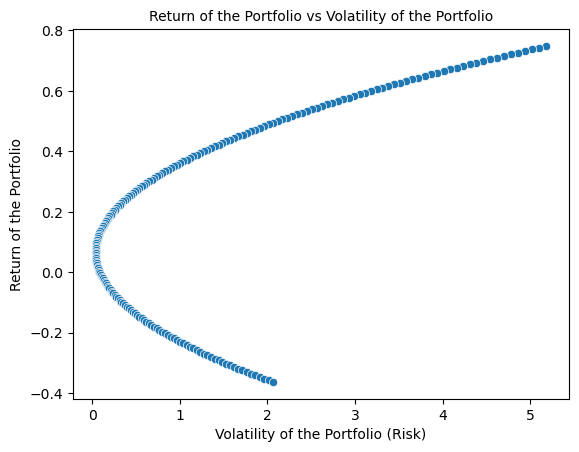

In [38]:
# plotting Risk vs Return
sns.scatterplot(y=df_markowitz['exp_ror_portfolio'],x=df_markowitz['qtr_volatity_portfolio'])
plt.title(label='Return of the Portfolio vs Volatility of the Portfolio',
          fontsize=10)
plt.xlabel(xlabel='Volatility of the Portfolio (Risk)',
            fontsize=10)
plt.ylabel(ylabel='Return of the Portfolio',
           fontsize=10)
plt.show()

From this graph, we get the idea that the optimal portfolio is the one that corresponds to the highest Return and lowest Risk.

Let us find out what weights of the chosen stocks correspond to this point on the graph:

In [39]:
# The ideal weights of your investment
weights = df_markowitz[df_markowitz['qtr_volatity_portfolio'] == df_markowitz['qtr_volatity_portfolio'].min()]
weights

,X_a,X_b,exp_ror_portfolio,qtr_volatity_portfolio
124,1.15,-0.15,0.063111,0.037817


In [40]:
# Final answer
print('The optimal portfolio would have',float(weights['X_a']*100),
      '% of your capital invested in Apple and',float(weights['X_b']*100),'% of your capital invested in Tesla')

The optimal portfolio would have 115.00000000000001 % of your capital invested in Apple and -15.000000000000014 % of your capital invested in Tesla


This doesn't make a whole lot of sense. How can you have -15% of your capital invested in a stock?
The answer is simple - The curve is letting us know that the optimal portfolio would have us shorting Tesla for 15% of our capital, then investing this extra 15% along with our existing 100% capital into Apple.

While this entire project is a bit simplistic, the fundamentals of how a Stock Portfolio is put together is all here.